In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pinyin

In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\

In [2]:
# define the year when the yearbook data were digitized
year = list(range(2000,2009)) + list(range(2013,2019))


# read the yearbook data as df
yearbook_dfs = [] 

for t in year:
    
    # read the excel file
    df = pd.read_excel(f'./02_Digitized_data/河南_{t}.xlsx',header=[0,1])
    df.set_index([('Unnamed: 0_level_0','地区')],inplace = True)
    
    # reshape the multileve df to single index df
    df = pd.DataFrame(df.T.stack()).reset_index()
    
    # add the year to df, and adjust the column order
    df['Year'] = t
    df.columns = ['Crop','Metrics','Region','Value','Year']
    df = df[['Year','Region','Crop','Metrics','Value']]
    df['Value'].astype('float')
    df['Region'].astype('string')
    
    # add df to the list
    yearbook_dfs.append(df)

In [3]:
# merge all df into one df
yearbook_df = pd.concat(yearbook_dfs,0)

In [4]:
# convert Chinese characters into English
yearbook_df['Region_en'] = yearbook_df['Region'].apply(lambda x:pinyin.get(x,format='strip') )
yearbook_df.replace('总产量(吨）', 'Yield (t)',inplace=True)
yearbook_df.replace('总产量 (吨）', 'Yield (t)',inplace=True)
yearbook_df.replace('总产量（吨）', 'Yield (t)',inplace=True)
yearbook_df.replace('每公顷产量 (公斤）', 'Unit yield (Kg/ha)',inplace=True)
yearbook_df.replace('每公顷产量(公斤)', 'Unit yield (Kg/ha)',inplace=True)
yearbook_df.replace('播种面积(千公顷）', 'Sown area (1000 ha)',inplace=True)

yearbook_df.replace('小麦', 'Wheat',inplace=True)
yearbook_df.replace('玉米', 'Corn',inplace=True)

yearbook_df = yearbook_df[['Year', 'Region','Region_en', 'Crop', 'Metrics', 'Value']]
yearbook_df.to_csv('./02_Digitized_data/Yearbook_all.csv',index=False,encoding='utf_8_sig')

In [5]:
yearbook_df[yearbook_df['Metrics']=='Unit yield (Kg/ha)'].sort_values(['Value'])

,Year,Region,Region_en,Crop,Metrics,Value
833,2003,沈邱县,shenqiuxian,Corn,Unit yield (Kg/ha),468.000000
832,2001,潢川县,huangchuanxian,Corn,Unit yield (Kg/ha),611.000000
386,2006,长垣县,changyuanxian,Wheat,Unit yield (Kg/ha),641.277445
547,2005,开封县,kaifengxian,Corn,Unit yield (Kg/ha),654.001007
849,2001,正阳县,zhengyangxian,Corn,Unit yield (Kg/ha),671.000000
...,...,...,...,...,...,...
556,2018,新乡县,xinxiangxian,Corn,Unit yield (Kg/ha),8761.061947
780,2000,武陟县,wuzhixian,Corn,Unit yield (Kg/ha),8891.000000
779,2000,博爱县,boaixian,Corn,Unit yield (Kg/ha),8943.000000
777,2001,博爱县,boaixian,Corn,Unit yield (Kg/ha),8982.000000


##### make plots to explore the data

<AxesSubplot:xlabel='Year', ylabel='Value'>

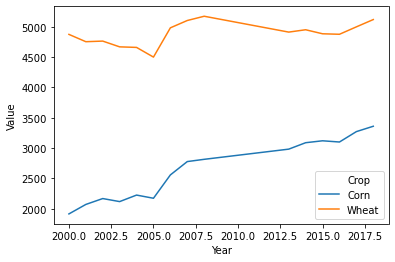

In [6]:
# Sown area change
sown_area     = yearbook_df[yearbook_df['Metrics'] == 'Sown area (1000 ha)']
sown_area_sum = pd.DataFrame(sown_area.groupby(['Year','Crop'])['Value'].sum())
sown_area_sum.reset_index(inplace=True)

sns.lineplot(data=sown_area_sum,x='Year',y='Value',hue='Crop')

<AxesSubplot:xlabel='Year', ylabel='Value'>

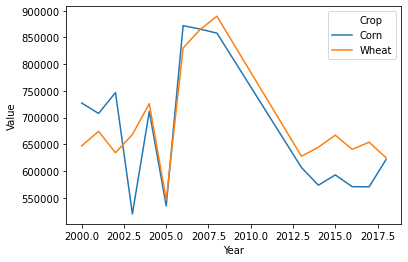

In [7]:
# totall yield change
total_yield      = yearbook_df[yearbook_df['Metrics'] == 'Unit yield (Kg/ha)']
total_yield_sum  = pd.DataFrame(total_yield.groupby(['Year','Crop'])['Value'].sum())
total_yield_sum.reset_index(inplace=True)

sns.lineplot(data=total_yield_sum,x='Year',y='Value',hue='Crop')

<AxesSubplot:xlabel='Year', ylabel='Unit_yield'>

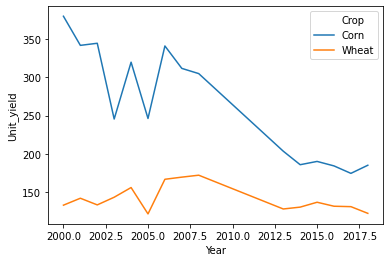

In [8]:
# unit yield change
unit_yield = total_yield_sum[['Year','Crop']]
unit_yield['Unit_yield'] = total_yield_sum['Value']/sown_area_sum['Value']

sns.lineplot(data=unit_yield,x='Year',y='Unit_yield',hue='Crop')